In [27]:
from bioinfokit import analys, visuz

In [34]:
eae_genes = pd.read_csv('EAE_gene_list.csv')

In [40]:
eae = df.loc[df['ENTREZID'].isin(eae_genes['GeneID'])]

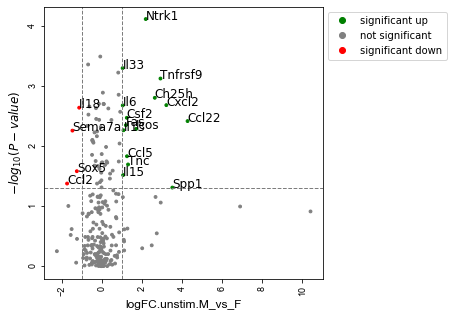

In [69]:
visuz.GeneExpression.volcano(df=eae, 
                             lfc='logFC.unstim.M_vs_F', 
                             axxlabel = 'logFC.unstim.M_vs_F', 
                             pv='PValue', 
                             show=True, 
                             plotlegend=True, 
                             legendpos='upper right',
                             legendanchor=(1.46,1), 
                             geneid='SYMBOL', 
                             genenames='deg', 
                             gfont=12, 
                             sign_line=True, 
                             axlabelfontsize=12)

In [44]:
df.columns

Index(['SYMBOL', 'ENTREZID', 'logFC.M.IgE_vs_unstim', 'logFC.F.IgE_vs_unstim',
       'logFC.IgE.M_vs_F', 'logFC.unstim.M_vs_F', 'logCPM', 'F', 'PValue',
       'PValue_fdr'],
      dtype='object')

In [73]:
counts = pd.read_csv('normalized_counts.csv')

In [78]:
counts = counts[['SYMBOL', 'ENTREZID', 'F_IgE_S3',
       'F_unstim_S4', 'M_IgE_S1', 'M_unstim_S2', 'M_IgE_S6', 'M_unstim_S7',
       'F_IgE_S8', 'F_unstim_S9']]

In [82]:
counts_eae = counts.loc[counts['ENTREZID'].isin(eae_genes['GeneID'])]

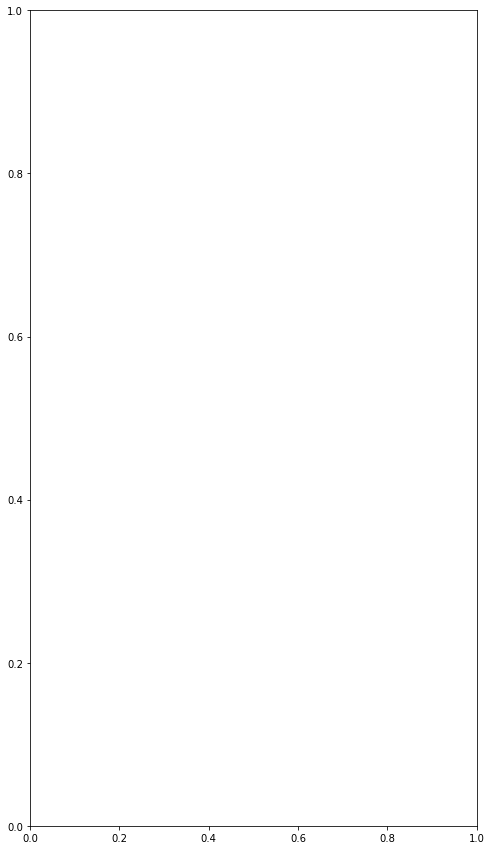

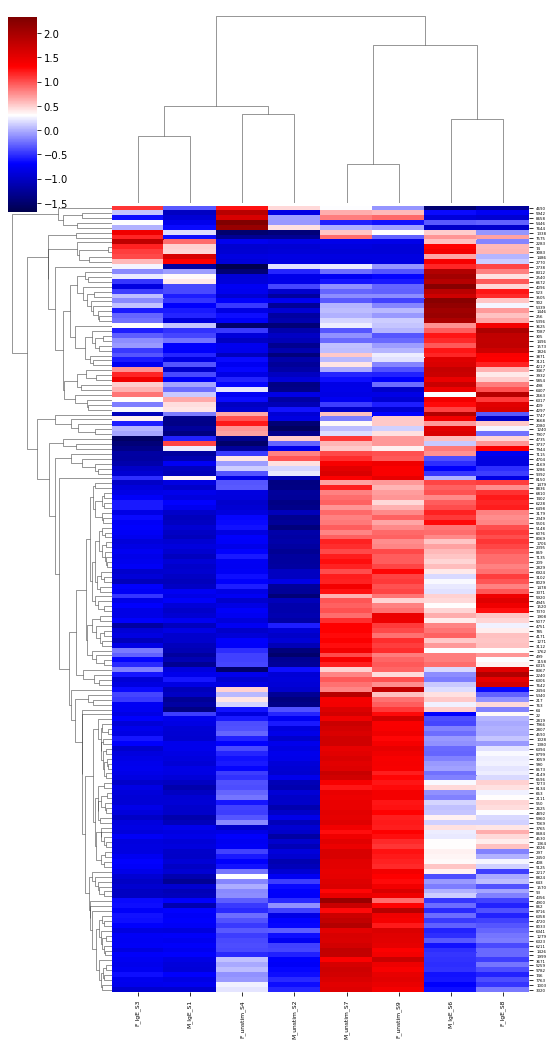

In [90]:
visuz.gene_exp.hmap(df=counts_eae[['F_IgE_S3','F_unstim_S4', 'M_IgE_S1', 'M_unstim_S2', 'M_IgE_S6', 'M_unstim_S7',
       'F_IgE_S8', 'F_unstim_S9']],
                    show=True,
                    dim=(8, 15), tickfont=(6, 4),
                    zscore=0)

<AxesSubplot:xlabel='logFC.unstim.M_vs_F', ylabel='logFC.F.IgE_vs_unstim'>

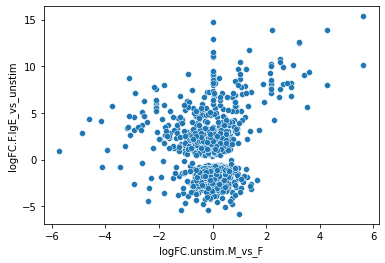

In [6]:
sns.scatterplot(data=df1, x='logFC.unstim.M_vs_F', y='logFC.F.IgE_vs_unstim')

In [7]:
df2 = df1.set_index('SYMBOL')

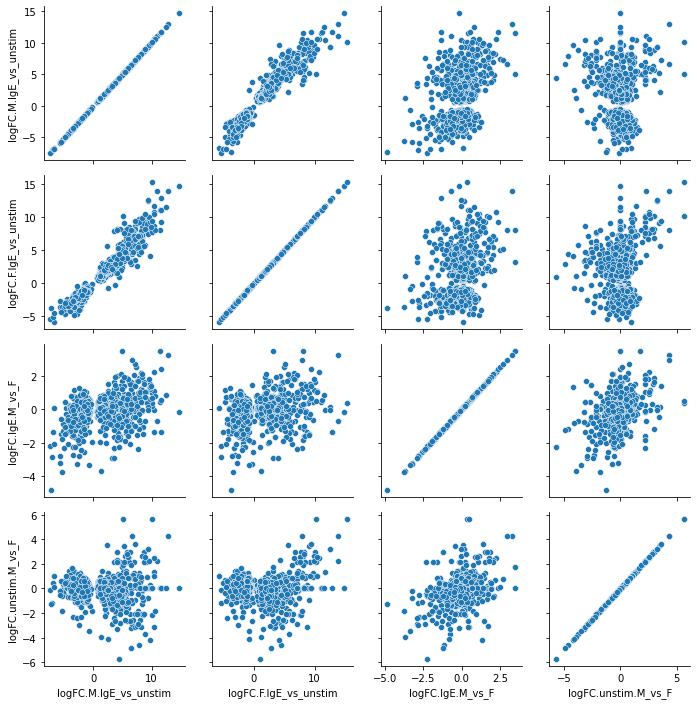

In [8]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='logFC.M.IgE_vs_unstim', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='logFC.F.IgE_vs_unstim', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='logFC.IgE.M_vs_F', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='logFC.unstim.M_vs_F', ylabel='Count'>

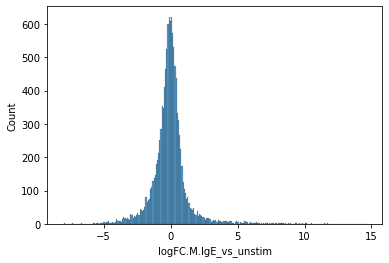

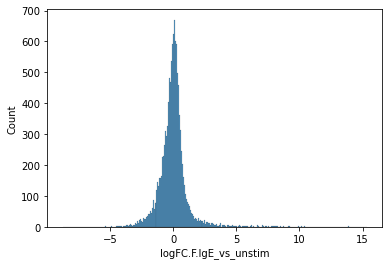

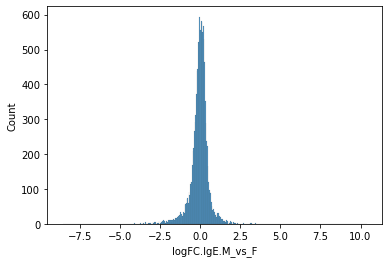

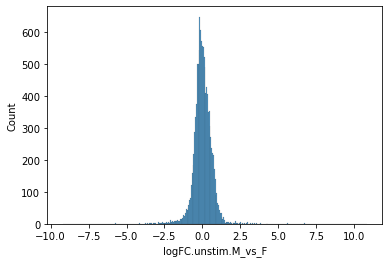

In [9]:
for column in df2.columns:
    plt.figure()             
    sns.histplot(df[column])

In [11]:
df2['logFC.IgE.M_vs_F'] > 0

SYMBOL
Ccnd2             True
Gmpr             False
Trim25           False
Ccm2             False
Itga5            False
                 ...  
C430002N11Rik    False
Bcl2a1a           True
1600023N17Rik     True
4930417O13Rik    False
Flt3l            False
Name: logFC.IgE.M_vs_F, Length: 1237, dtype: bool

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca.fit(df2)

PCA(n_components=2)

In [14]:
df3 = pca.transform(df2)

In [15]:
df3=pd.DataFrame(df3, index=df1['SYMBOL'], columns = ['PCA1', 'PCA2'])

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

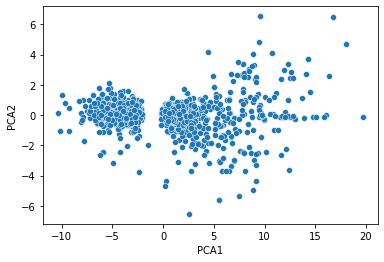

In [16]:
sns.scatterplot(data=df3, x='PCA1', y='PCA2')

In [17]:
pca.components_

array([[ 0.72992527,  0.68068753,  0.06109769,  0.01185995],
       [-0.31480002,  0.30004258,  0.25018953,  0.86503213]])

In [18]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(df2)
embedding.shape

(1237, 2)

In [19]:
df4=pd.DataFrame(embedding, index=df1['SYMBOL'], columns = ['X', 'Y'])

<AxesSubplot:xlabel='X', ylabel='Y'>

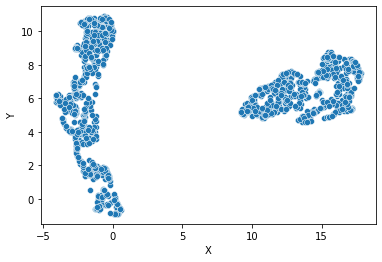

In [20]:
sns.scatterplot(data=df4, x='X', y='Y')

In [21]:
df4

,X,Y
SYMBOL,,
Ccnd2,-2.106672,6.960350
Gmpr,11.815172,5.740322
Trim25,-2.412827,8.973996
Ccm2,17.775383,7.313172
Itga5,-1.522937,7.581512
...,...,...
C430002N11Rik,-2.187067,4.455086
Bcl2a1a,-0.220331,-0.817532
1600023N17Rik,-2.049876,4.629951
